<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/CIFAR10_dataset_model_saving_criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the CIFAR-10 image dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

cifar = tf.keras.datasets.cifar10

2.4.1


In [2]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

x train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the [CIFAR homepage](https://www.cs.toronto.edu/%7Ekriz/cifar.html).



In [4]:
labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

###Let's use a smaller subset of dataset to speed up the things

In [6]:
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [7]:
print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

x train shape: (10000, 32, 32, 3)
y train shape: (10000, 1)
x test shape: (1000, 32, 32, 3)
y test shape: (1000, 1)


###Let's plot some of images

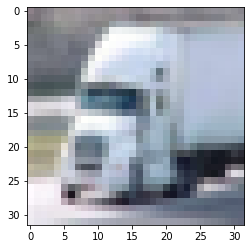

this is image of truck


In [8]:
import matplotlib.pyplot as plt
import numpy as np

inx = np.random.choice(x_train.shape[0])
img = x_train[inx]
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()
img_label = labels[y_train[inx][0]]
print('this is image of {}'.format(img_label))

['horse', 'automobile', 'bird', 'cat', 'horse', 'dog', 'automobile', 'deer', 'horse', 'airplane']


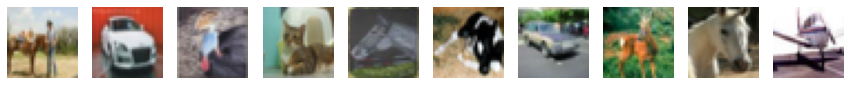

In [9]:
fig, ax = plt.subplots(1, 10, figsize=(15, 15))

img_labels=[]
for i in range(10):
  inx = np.random.choice(x_train.shape[0])
  img = x_train[inx]
  ax[i].imshow(img)
  ax[i].set_axis_off()
  img_labels.append(labels[y_train[inx][0]])
print(img_labels)


# Build a sequential convolutional neural network for image classification


In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

def get_model():
  model = Sequential([Conv2D(filters=16, kernel_size=(3,3),
                             input_shape=(32, 32, 3), activation='relu',
                             name='Conv2D_1'),
                      Conv2D(filters=8, kernel_size=(3,3), activation='relu',
                             name='Conv2D_2'),
                      MaxPooling2D(pool_size=(4,4), name='MaxPooling2D_1'),
                      Flatten(name='flatten'),
                      Dense(32, activation='relu', name='Dense_1'),
                      Dense(10, activation='softmax', name='Dense_2')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  return model

In [11]:
model = get_model()
model.summary()
del model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
MaxPooling2D_1 (MaxPooling2D (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
Dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

## Let's also define a helper function to evaluate the model on test images

In [12]:
def get_test_accuracy(model, x_test, y_test):
  test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=False)
  print('test accuracy: {}'.format(test_acc))

# Model saving criteria:
Let's start with a more sophisticated checkpoint

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

#checkpoint_path = 'model_checkpoint/checkpoint_{epoch:04d}_{batch:04d}'
# It seems there is a bug that checkpoint with batch does not work
checkpoint_path = \
'model_checkpoint/checkpoint_{epoch:02d}_{batch:03d}'

In [14]:
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_freq=500,
                             save_weights_only=True,
                             verbose=1
                             )

In [15]:
print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 1)


In [16]:
print(tf.__version__)
model = get_model()
model.fit(x= x_train, y= y_train,
          validation_data=(x_test, y_test),
          epochs=3,
          callbacks=[checkpoint], 
          batch_size=10)

2.4.1
Epoch 1/3
 487/1000 [=============>................] - ETA: 1s - loss: 2.1990 - accuracy: 0.1864

KeyError: ignored

## The above error does not occur in tensorflow 2.0.0!

In [17]:
! ls model_checkpoint/

ls: cannot access 'model_checkpoint/': No such file or directory
